In [1]:
# imports (may be more than needed)
import pandas as pd
import numpy as np
import glob # to find all files in folder
from datetime import datetime
from datetime import date, time
from dateutil.parser import parse
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import itertools
%matplotlib inline
sns.set_context('notebook')
pd.options.mode.chained_assignment = None  # default='warn'


#  Master Data
_Obtain all the data for the Bachelor students, starting from 2007. Keep only the students for which you have an entry for both Bachelor semestre 1 and Bachelor semestre 6. Compute how many months it took each student to go from the first to the sixth semester. Partition the data between male and female students, and compute the average -- is the difference in average statistically significant?_


2) Perform a similar operation to what described above, this time for Master students. Notice that this data is more tricky, as there are many missing records in the IS-Academia database. Therefore, try to guess how much time a master student spent at EPFL by at least checking the distance in months between Master semestre 1 and Master semestre 2. If the Mineur field is not empty, the student should also appear registered in Master semestre 3. Last but not the least, don't forget to check if the student has an entry also in the Projet Master tables. Once you can handle well this data, compute the "average stay at EPFL" for master students. Now extract all the students with a Spécialisation and compute the "average stay" per each category of that attribute -- compared to the general average, can you find any specialization for which the difference in average is statistically significant?

## Read the data from csv

In [2]:
all_data = pd.read_csv('all_data.csv', usecols=['Civilité', 'Nom_Prénom', 'title', 'periode_acad', 'periode_pedago','Orientation_Master', 'Spécialisation', 'Filière_opt.', 'Mineur', 'Statut', 'Type_Echange', 'Ecole_Echange', 'No_Sciper'])

In [3]:
all_data.sort_values(by='No_Sciper', axis=0)

,Civilité,Nom_Prénom,Orientation_Master,Spécialisation,Filière_opt.,Mineur,Statut,Type_Echange,Ecole_Echange,No_Sciper,title,periode_acad,periode_pedago
7567,Monsieur,Martin Damien,NaN,NaN,NaN,NaN,Présent,NaN,NaN,121367,"Passerelle HES - IN, 2016-2017, Semestre automne",2016-2017,Semestre automne
8828,Monsieur,Gulati Asheesh,NaN,Internet computing,NaN,NaN,Présent,NaN,NaN,128911,"Informatique, 2007-2008, Master semestre 3",2007-2008,Master semestre 3
8602,Monsieur,Gulati Asheesh,NaN,Internet computing,NaN,NaN,Présent,NaN,NaN,128911,"Informatique, 2007-2008, Master semestre 2",2007-2008,Master semestre 2
8870,Monsieur,Zhou Maoan,NaN,NaN,NaN,NaN,Stage,NaN,NaN,129093,"Informatique, 2007-2008, Master semestre 3",2007-2008,Master semestre 3
8654,Monsieur,Zhou Maoan,NaN,NaN,NaN,NaN,Présent,NaN,NaN,129093,"Informatique, 2007-2008, Master semestre 2",2007-2008,Master semestre 2
7563,Monsieur,Essellak Radouane,NaN,NaN,NaN,NaN,Présent,NaN,NaN,129094,"Passerelle HES - IN, 2016-2017, Semestre automne",2016-2017,Semestre automne
8848,Monsieur,Ni Zhong Zhong,NaN,NaN,NaN,NaN,Présent,NaN,NaN,129326,"Informatique, 2007-2008, Master semestre 3",2007-2008,Master semestre 3
8631,Monsieur,Ni Zhong Zhong,NaN,NaN,NaN,NaN,Présent,NaN,NaN,129326,"Informatique, 2007-2008, Master semestre 2",2007-2008,Master semestre 2
8407,Monsieur,Droz-dit-Busset Arnault,NaN,NaN,NaN,NaN,Présent,NaN,NaN,138088,"Informatique, 2007-2008, Master semestre 1",2007-2008,Master semestre 1
8813,Monsieur,Clivaz Jean-Philippe,NaN,NaN,NaN,NaN,Présent,NaN,NaN,145546,"Informatique, 2007-2008, Master semestre 3",2007-2008,Master semestre 3


In [4]:
len(all_data)

8942

## Clean the data

In [5]:
all_data['periode_pedago'].unique()

array(['Bachelor semestre 5', 'Master semestre 1', 'Bachelor semestre 2',
       'Bachelor semestre 6', 'Master semestre 2',
       'Projet Master printemps', 'Bachelor semestre 3',
       'Bachelor semestre 1', 'Master semestre 3', 'Semestre printemps',
       'Projet Master automne', 'Semestre automne', 'Bachelor semestre 4'], dtype=object)

In [6]:
all_data['title'].unique()

array(['Informatique, 2009-2010, Bachelor semestre 5',
       'Informatique, 2009-2010, Master semestre 1',
       'Informatique, 2009-2010, Bachelor semestre 2',
       'Informatique, 2009-2010, Bachelor semestre 6',
       'Informatique, 2009-2010, Master semestre 2',
       'Informatique, 2009-2010, Projet Master printemps',
       'Informatique, 2009-2010, Bachelor semestre 3',
       'Informatique, 2009-2010, Bachelor semestre 1',
       'Informatique, 2009-2010, Master semestre 3',
       'Passerelle HES - IN, 2009-2010, Semestre printemps',
       'Informatique, 2009-2010, Projet Master automne',
       'Passerelle HES - IN, 2009-2010, Semestre automne',
       'Echange IN, 2009-2010, Semestre automne',
       'Informatique, 2009-2010, Bachelor semestre 4',
       'Informatique, 2014-2015, Bachelor semestre 5',
       'Informatique, 2014-2015, Master semestre 1',
       'Informatique, 2014-2015, Bachelor semestre 2',
       'Informatique, 2014-2015, Bachelor semestre 6',
       

checkout what the Semester printemps and automne are

In [7]:
all_data[all_data['periode_pedago'].isin(['Semestre printemps', 'Semestre automne'])]['title'].unique()

array(['Passerelle HES - IN, 2009-2010, Semestre printemps',
       'Passerelle HES - IN, 2009-2010, Semestre automne',
       'Echange IN, 2009-2010, Semestre automne',
       'Passerelle HES - IN, 2014-2015, Semestre printemps',
       'Echange IN, 2014-2015, Semestre printemps',
       'Passerelle HES - IN, 2014-2015, Semestre automne',
       'Echange IN, 2014-2015, Semestre automne',
       'Passerelle HES - IN, 2012-2013, Semestre printemps',
       'Passerelle HES - IN, 2012-2013, Semestre automne',
       'Echange IN, 2012-2013, Semestre automne',
       'Echange IN, 2008-2009, Semestre printemps',
       'Echange IN, 2008-2009, Semestre automne',
       'Passerelle HES - IN, 2015-2016, Semestre printemps',
       'Echange IN, 2015-2016, Semestre printemps',
       'Echange IN, 2015-2016, Semestre automne',
       'Passerelle HES - IN, 2015-2016, Semestre automne',
       'Passerelle HES - IN, 2011-2012, Semestre printemps',
       'Echange IN, 2011-2012, Semestre printemps',
 

This are the students in exchange (epfl students in exchange somewhere else) and students doing the Passerelle HES. As the students in exchange are in thir 3rd year Bachelor we ignore them. Also we won't count students in Passerelle HES as beeing in the Master just yet because they have to succeed the passerelle to optain a master. So if they do a master they are inscribed in Master anyways.

In [8]:
master_periode_pedago = ['Master semestre 1', 'Master semestre 2', 'Projet Master printemps', 'Master semestre 3', 'Projet Master automne']
master_data = all_data[all_data['periode_pedago'].isin(master_periode_pedago)]

remove the columns with only NaN (in case there is one)

In [9]:
master_data.dropna(axis=1, how='all', inplace=True)

Rename the columns (remove the é and give shorter names)

In [10]:
master_data.rename(columns={'Civilité': 'Sex', 'Nom_Prénom': 'Name', 'Spécialisation': 'Specialisation'}, inplace=True)

In [11]:
master_data['periode_pedago'].unique()

array(['Master semestre 1', 'Master semestre 2', 'Projet Master printemps',
       'Master semestre 3', 'Projet Master automne'], dtype=object)

add some columns that make the use of the data easier later
- store the start and end year of each entry ('2008-2009' -> 2008) and '2008-2009' -> 2009
- make a column for master1, master2, master3 and and project master and indicate if done it (true and false)

In [12]:
master_data['periode_acad'].unique()

array(['2009-2010', '2014-2015', '2012-2013', '2008-2009', '2015-2016',
       '2011-2012', '2013-2014', '2016-2017', '2010-2011', '2007-2008'], dtype=object)

In [13]:
# store the year of the entry
def start_year(student):
    return int (student['periode_acad'].split('-')[0])
master_data['start_year'] = master_data.apply(start_year, axis=1)
master_data['end_year'] = master_data.apply(lambda st: start_year(st)+1, axis=1)

In [14]:
# make the indicator columns
new_cols_map = {
    'Master1': ['Master semestre 1'],
    'Master2': ['Master semestre 2'],
    'Master3': ['Master semestre 3'],
    'Project_Master' : ['Projet Master printemps', 'Projet Master automne']
}
for (new_col_name, match_list) in new_cols_map.items():
    master_data[new_col_name] = master_data.apply(lambda student: student['periode_pedago'] in match_list, axis=1)


In [15]:
# show the new master_data (sample randomly to keep it managable but still informative)
master_data.sample(n = 10, axis=0, replace=False)

,Sex,Name,Specialisation,Mineur,Statut,Type_Echange,Ecole_Echange,No_Sciper,title,periode_acad,periode_pedago,start_year,end_year,Master3,Master2,Project_Master,Master1
8417,Monsieur,Gfeller Sebastian,NaN,NaN,Présent,NaN,NaN,161357,"Informatique, 2007-2008, Master semestre 1",2007-2008,Master semestre 1,2007,2008,False,False,False,True
6055,Monsieur,Bourqui Marc,Service science,NaN,Présent,NaN,NaN,184264,"Informatique, 2013-2014, Master semestre 2",2013-2014,Master semestre 2,2013,2014,False,True,False,False
5122,Monsieur,Shaikhha Amir,NaN,NaN,Présent,NaN,NaN,211771,"Informatique, 2011-2012, Master semestre 2",2011-2012,Master semestre 2,2011,2012,False,True,False,False
7361,Monsieur,Künstner Frederik Dieter,Computer Science Theory,NaN,Présent,NaN,NaN,227443,"Informatique, 2016-2017, Master semestre 3",2016-2017,Master semestre 3,2016,2017,True,False,False,False
8848,Monsieur,Ni Zhong Zhong,NaN,NaN,Présent,NaN,NaN,129326,"Informatique, 2007-2008, Master semestre 3",2007-2008,Master semestre 3,2007,2008,True,False,False,False
2008,Madame,Zerva Chrysoula,NaN,NaN,Présent,NaN,NaN,226037,"Informatique, 2012-2013, Master semestre 1",2012-2013,Master semestre 1,2012,2013,False,False,False,True
786,Monsieur,Berdat Johan,"Signals, Images and Interfaces",NaN,Présent,NaN,NaN,204393,"Informatique, 2014-2015, Master semestre 1",2014-2015,Master semestre 1,2014,2015,False,False,False,True
8001,Madame,Stojanov Marica,NaN,"Mineur en Management, technologie et entrepren...",Présent,NaN,NaN,196602,"Informatique, 2010-2011, Master semestre 2",2010-2011,Master semestre 2,2010,2011,False,True,False,False
6104,Monsieur,Hugonot Joachim,Internet computing,NaN,Présent,NaN,NaN,186598,"Informatique, 2013-2014, Master semestre 2",2013-2014,Master semestre 2,2013,2014,False,True,False,False
1967,Monsieur,Laurent Florian,NaN,NaN,Présent,NaN,NaN,174847,"Informatique, 2012-2013, Master semestre 1",2012-2013,Master semestre 1,2012,2013,False,False,False,True


We will remove all students that did certainly not finish the master. That is we remove students that:
- Have not done the Master 1 semestre. (There are not a lot of them (see later) and it is too cumbersome to track them and check if they eventually passed or not)
- Did only 1 semester. (They did not pass)
- Have a mineur or spez and did less than 3 semesters. (Theyalso did not pass)

We also remove students that already have been studing in 2007 (the start of our data) because we can not tell how long they already have studied before.
Note that the students like us that have not finished yet will be removed by the first 3 points.



In [16]:
# find all students that have not done the 'master 1' semester -> have not studied enough to finish the master.
grouped = master_data.groupby(by='No_Sciper')
no_master_1 = pd.DataFrame(columns=['Civilité', 'Nom_Prénom', 'Orientation_Bachelor', 'Orientation_Master',
      'Spécialisation', 'Filière_opt.', 'Mineur', 'Statut', 'Type_Echange',
      'Ecole_Echange', 'No_Sciper', 'title', 'periode_acad',
      'periode_pedago']) 
for scip, group in grouped:
    if (group.periode_pedago != 'Master semestre 1').all():
        no_master_1 = pd.concat([no_master_1, group])
len(no_master_1.No_Sciper.unique())

76

In [17]:
# all the students that already studied in the '2007-2008' year:
df_2006 = no_master_1[no_master_1.periode_acad == '2007-2008']
len(df_2006.No_Sciper.unique())

66

remove the found students (that did not do the master 1 semester). The others will be removed later.

In [18]:
sciper_to_remove = no_master_1['No_Sciper'].unique()
master_data = master_data[~master_data['No_Sciper'].isin(sciper_to_remove)]

#### Groupby and aggregate by student

In [19]:
def group_master_data(grouped_entries):
    # check that there are no two students with the same sciper number
    must_be_unique_list = ['Sex', 'Name'] #No_Scyper also but we group by it -> unique by definition
    #if(len(grouped_entries[unique_col].unique()) > 1): raise ValueError('Two students of different '+unique_col+' with same No_Sciper') for unique_col in must_be_unique_list]
    
    #aggregate the cols
    first_entry = grouped_entries.head(1)
    df_map = {
        'No_Sciper' : first_entry['No_Sciper'].values[0],
        'Name' : first_entry['Name'].values[0],
        'Sex' : first_entry['Sex'].values[0],
        'Specialisation' : grouped_entries['Specialisation'].dropna().unique(),
        'Mineur' : grouped_entries['Mineur'].dropna().unique(),
        'first_year': grouped_entries['start_year'].min(), # smallest start year entry
        'last_year' : grouped_entries['end_year'].max(), # highest year a studend appears (eg 2010)
        'first_semestre' : grouped_entries.sort_values(by=['start_year', 'periode_pedago'], axis=0, ascending=True)['periode_pedago'].values[0], # eg master1
        'last_semestre' : grouped_entries.sort_values(by=['end_year', 'periode_pedago'], axis=0, ascending=False)['periode_pedago'].values[0], # the name of the last semester (eg. master 3)
        'semesters_done' : grouped_entries.sort_values(by=['end_year'])['periode_pedago'].values,
        'nombre_semestres' : len(grouped_entries), # how many different semesters the student did at epfl
        'project_master' : grouped_entries['Project_Master'].sum() > 0
    } 
    df_map['mineur_or_spez'] = len(df_map['Specialisation']) + len(df_map['Mineur']) > 0
    df_map['to_remove'] = df_map['nombre_semestres'] <= 1 or (not df_map['mineur_or_spez'] and df_map['nombre_semestres'] <= 2)
    
    # if there are two spez, take the latest one
    if len(df_map['Specialisation']) > 1:
        print(df_map['No_Sciper'])
        df_map['Specialisation'] = grouped_entries[grouped_entries['end_year'] == df_map['last_year']]['Specialisation'].values[0]
    elif len(df_map['Specialisation']) == 1:
        df_map['Specialisation'] = df_map['Specialisation'][0]
        
    # set correct NaNs
    if len(df_map['Mineur']) == 0:
        df_map['Mineur'] = np.nan
    if len(df_map['Specialisation']) == 0:
        df_map['Specialisation'] = np.nan
    
    # make Dataframe
    for (k, v) in df_map.items():
        df_map[k] = [v]
    return pd.DataFrame.from_dict(df_map)
    
    
grouped_master = master_data.groupby(by='No_Sciper', as_index=False, sort=True).apply(group_master_data)
grouped_master.head()

175703
180570
184264
204253
261006


,,Mineur,Name,No_Sciper,Sex,Specialisation,first_semestre,first_year,last_semestre,last_year,mineur_or_spez,nombre_semestres,project_master,semesters_done,to_remove
0,0,NaN,Droz-dit-Busset Arnault,138088,Monsieur,NaN,Master semestre 1,2007,Master semestre 1,2008,False,1,False,[Master semestre 1],True
1,0,NaN,Cardinaux Damien,146330,Monsieur,NaN,Master semestre 1,2007,Master semestre 3,2009,False,3,False,"[Master semestre 1, Master semestre 2, Master ...",False
2,0,NaN,Marx Clément,146742,Monsieur,"Signals, Images and Interfaces",Master semestre 1,2008,Master semestre 3,2013,True,7,True,"[Master semestre 1, Master semestre 2, Master ...",False
3,0,NaN,Junod Antoine,146929,Monsieur,NaN,Master semestre 1,2007,Master semestre 2,2008,False,2,False,"[Master semestre 1, Master semestre 2]",True
4,0,NaN,Good Xavier,147008,Monsieur,"Signals, Images and Interfaces",Master semestre 1,2011,Master semestre 3,2013,True,4,False,"[Master semestre 1, Master semestre 2, Master ...",False


remove the students that have not finished their master (described above)

In [20]:
students_to_remove = grouped_master[grouped_master['to_remove']]
len(students_to_remove)

254

In [21]:
grouped_master = grouped_master[~grouped_master['to_remove']]

In [22]:
grouped_master.set_index('No_Sciper', inplace=True)
len(grouped_master)

647

## How many month did it take each student

First without any further cleaning and thinking

In [23]:
master_epfl = grouped_master.copy()


(array([   0.,    7.,  365.,  154.,  101.,   13.,    6.,    1.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 8 Patch objects>)

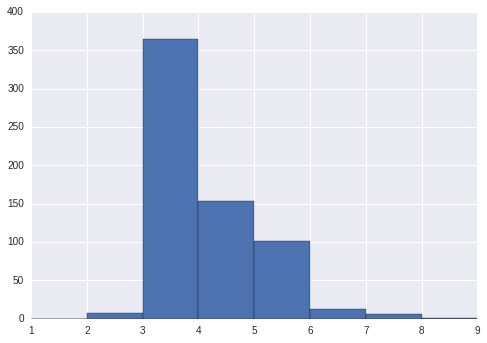

In [24]:
plt.hist(master_epfl['nombre_semestres'], bins=8, range=[1, 9])

In [25]:
master_epfl.describe()

,first_year,last_year,nombre_semestres
count,647.000000,647.000000,647.000000
mean,2011.780526,2014.007728,3.644513
std,2.520146,2.590457,0.909392
min,2007.000000,2009.000000,2.000000
25%,2010.000000,2012.000000,3.000000
50%,2012.000000,2014.000000,3.000000
75%,2014.000000,2017.000000,4.000000
max,2015.000000,2017.000000,8.000000


The mean of the number of semesters is around 3.6 semesters.
However not all students are inscribed in the the Master Project (missing data?), but in the plot above we assume everyone finished their master. 
So we add to all students that are not inscribed in a Master Project one semester:

In [26]:
def add_semester_if_no_PM(row):
    t = row.nombre_semestres
    if(not row.project_master):
        return t + 1
    else:
        return t
        
master_added_sem = master_epfl.copy()
master_added_sem['nombre_semestres'] = master_epfl.apply(add_semester_if_no_PM, axis=1)


In [27]:
master_added_sem.describe()

,first_year,last_year,nombre_semestres
count,647.000000,647.000000,647.000000
mean,2011.780526,2014.007728,4.468315
std,2.520146,2.590457,0.868346
min,2007.000000,2009.000000,3.000000
25%,2010.000000,2012.000000,4.000000
50%,2012.000000,2014.000000,4.000000
75%,2014.000000,2017.000000,5.000000
max,2015.000000,2017.000000,8.000000


It made a big difference. But that seems reasonable since most students do a Mineur/Spez which makes already 4 semesters (PM included)

(array([   0.,    0.,   39.,  366.,  162.,   64.,   12.,    4.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 8 Patch objects>)

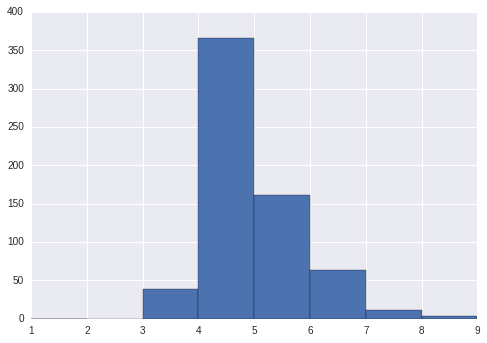

In [28]:
plt.hist(master_added_sem['nombre_semestres'], bins=8, range=[1, 9])

## And per specialisation
We will take tha 'added_semester' data since we think it is more accurate.
Note that the average number of semesters is only 0.3 higher than the one of all students.

In [29]:
master_with_spez = master_added_sem[~pd.isnull(master_added_sem['Specialisation'])]
master_with_spez.describe()

,first_year,last_year,nombre_semestres
count,243.000000,243.000000,243.000000
mean,2011.292181,2013.592593,4.736626
std,2.692395,2.814269,0.951606
min,2007.000000,2009.000000,3.000000
25%,2009.000000,2011.000000,4.000000
50%,2011.000000,2014.000000,4.000000
75%,2014.000000,2017.000000,5.000000
max,2015.000000,2017.000000,8.000000


almost 50% of all students do a minor or a spezialisation:

In [37]:
# how many percent of students do a spezialisation
100/len(master_added_sem) * len(master_with_spez)

37.557959814528594

In [38]:
# how many percent of students do a minor
100/len(master_added_sem) * len(master_added_sem[~pd.isnull(master_added_sem['Mineur'])])

11.901081916537867

What are the different spezialisations and how popular are they?

In [32]:
# The different specialisations
master_with_spez['Specialisation'].unique()

array(['Signals, Images and Interfaces', 'Internet computing',
       'Biocomputing', 'Foundations of Software',
       'Computer Engineering - SP', 'Service science', 'Software Systems',
       'Information Security - SP', 'Data Analytics',
       'Internet Information Systems', 'Computer Science Theory'], dtype=object)

A nice plot showing that there is a huge difference in the number of people taking the different Spezialisations

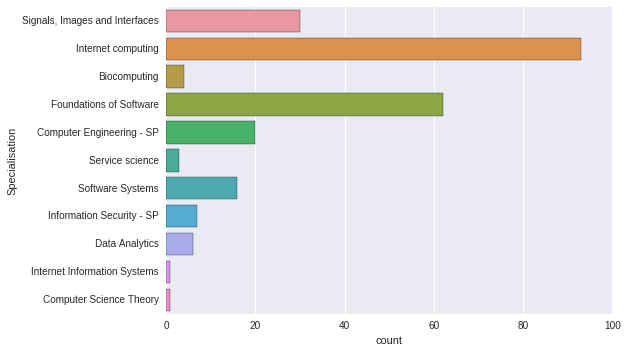

In [33]:
sns.countplot(y="Specialisation", data=master_with_spez);

In the time taken to colmplete their studies they don't differ a lot.
(The red dotted line is the averarge of all students, the blue line the average of the students with spezialisations)

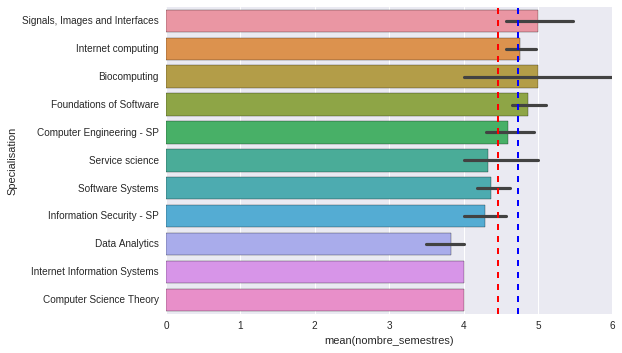

In [34]:
ax = sns.barplot(x='nombre_semestres', y='Specialisation', data=master_with_spez);
plt.axvline(master_with_spez['nombre_semestres'].mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(master_added_sem['nombre_semestres'].mean(), color='r', linestyle='dashed', linewidth=2)

In [35]:
def calc_diff_from_average(col, average):
    return (lambda row: row[col] - average)
master_with_spez['diff_from_average'] = master_with_spez.apply(calc_diff_from_average('nombre_semestres', master_with_spez['nombre_semestres'].mean()), axis=1)

Only the last 5 specialisations seem to diverge substantially from the average (their confidence intervall does not include the mean)
This are also not taken by a lot of students. In fact they were introduced this semester, which also explains the lower average time. The students taking this spezialisations have not yet finished their studies which leads to the lower time.

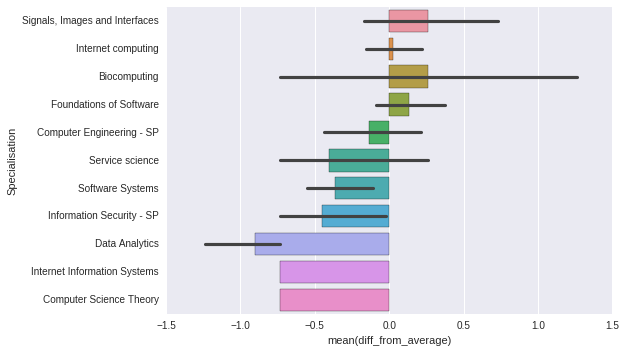

In [36]:
sns.barplot(x='diff_from_average', y='Specialisation', data=master_with_spez);

TODO: CONTINUE :P
- Remove the students with the new spez? or just take the older spez for this students?

without new spez:

In [50]:
new_spezs = ['Information Security - SP', 'Data Analytics', 'Internet Information Systems', 'Computer Science Theory']
master_without_new_spez= master_with_spez[~master_with_spez['Specialisation'].isin(new_spezs)]

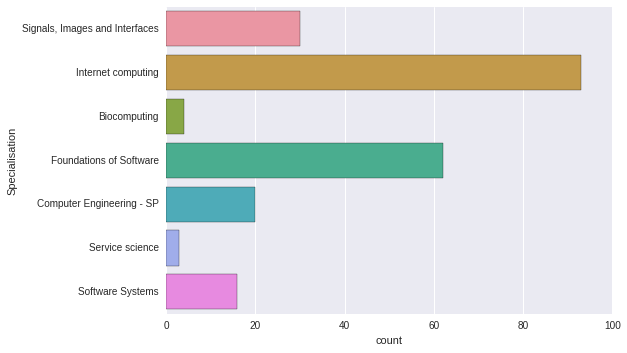

In [51]:
sns.countplot(y="Specialisation", data=master_without_new_spez);

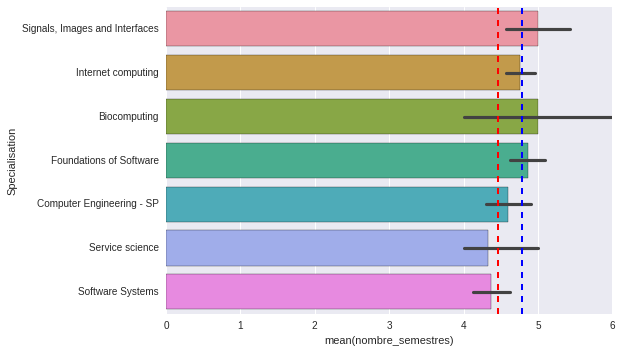

In [52]:
ax = sns.barplot(x='nombre_semestres', y='Specialisation', data=master_without_new_spez);
plt.axvline(master_without_new_spez['nombre_semestres'].mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(master_added_sem['nombre_semestres'].mean(), color='r', linestyle='dashed', linewidth=2)

## Female vs Male (Optional)